# Plotting accuracy maps based on AEZs

Generate accuracy maps using output from 03_Accuracy_Assessment-AEZ.ipynb.

**Input data** : `<AEZ>_wofs_ls_validation_points.csv`

**Output_data** : `aez_accuracy_map.png`

Last modified: 13/02/2023

start by importing what you need 

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

read in theconfusion matrix csvs as pandas data frames

In [2]:
# read in the institution files, preferably the ones that have had columns dropped already in the processing step
east_conf = pd.read_csv('../02_Validation_results/WOfS_Assessment/wofs_ls/ConfusionMatrix/Eastern_confusion_matrix.csv')
west_conf = pd.read_csv('../02_Validation_results/WOfS_Assessment/wofs_ls/ConfusionMatrix/Western_confusion_matrix.csv')
north_conf = pd.read_csv('../02_Validation_results/WOfS_Assessment/wofs_ls/ConfusionMatrix/Northern_confusion_matrix.csv')
south_conf = pd.read_csv('../02_Validation_results/WOfS_Assessment/wofs_ls/ConfusionMatrix/Southern_confusion_matrix.csv')
cent_conf = pd.read_csv('../02_Validation_results/WOfS_Assessment/wofs_ls/ConfusionMatrix/Central_confusion_matrix.csv')
sahel_conf = pd.read_csv('../02_Validation_results/WOfS_Assessment/wofs_ls/ConfusionMatrix/Sahel_confusion_matrix.csv')
io_conf = pd.read_csv('../02_Validation_results/WOfS_Assessment/wofs_ls/ConfusionMatrix/Indian_ocean_confusion_matrix.csv')

Now read in the shape files for all of the AEZs

In [3]:
east_shp = gpd.read_file('../02_Validation_data/AEZ_shapefiles/Eastern.shp')
west_shp = gpd.read_file('../02_Validation_data/AEZ_shapefiles/Western.shp')
north_shp = gpd.read_file('../02_Validation_data/AEZ_shapefiles/Northern.shp')
south_shp = gpd.read_file('../02_Validation_data/AEZ_shapefiles/Southern.shp')
cent_shp = gpd.read_file('../02_Validation_data/AEZ_shapefiles/Central.shp')
sahel_shp = gpd.read_file('../02_Validation_data/AEZ_shapefiles/Sahel.shp')
io_shp = gpd.read_file('../02_Validation_data/AEZ_shapefiles/Indian_ocean.shp')

Next is to add columns for the confusion matrix values we want to each of the shapes.

In [4]:
# to access the overall accuracy use 
east_conf["Producer's"][3]

'87.3'

In [5]:
# to access the producer's water use 
east_conf["Producer's"][1]

'85.72'

In [6]:
# and to access the user's water use
east_conf["Water"][3]

96.32

Now add these columns to the shape files.

In [7]:
east_shp_cols = east_shp.assign(Overall=float(east_conf["Producer's"][3]),
                                Producer=float(east_conf["Producer's"][1]),
                                User=float(east_conf["Water"][3]))
west_shp_cols = west_shp.assign(Overall=float(west_conf["Producer's"][3]),
                                Producer=float(west_conf["Producer's"][1]),
                                User=float(west_conf["Water"][3]))
north_shp_cols = north_shp.assign(Overall=float(north_conf["Producer's"][3]),
                                Producer=float(north_conf["Producer's"][1]),
                                User=float(north_conf["Water"][3]))
south_shp_cols = south_shp.assign(Overall=float(south_conf["Producer's"][3]),
                                Producer=float(south_conf["Producer's"][1]),
                                User=float(south_conf["Water"][3]))
cent_shp_cols = cent_shp.assign(Overall=float(cent_conf["Producer's"][3]),
                                Producer=float(cent_conf["Producer's"][1]),
                                User=float(cent_conf["Water"][3]))
sahel_shp_cols = sahel_shp.assign(Overall=float(sahel_conf["Producer's"][3]),
                                Producer=float(sahel_conf["Producer's"][1]),
                                User=float(sahel_conf["Water"][3]))
io_shp_cols = io_shp.assign(Overall=float(io_conf["Producer's"][3]),
                                Producer=float(io_conf["Producer's"][1]),
                                User=float(io_conf["Water"][3]))

Now to concatenate all of these tables into one.

In [8]:
shapes = [east_shp_cols, west_shp_cols, north_shp_cols, south_shp_cols, cent_shp_cols, sahel_shp_cols, io_shp_cols]
#africa_accuracy = gpd.concat(shapes)
africa_accuracy = gpd.GeoDataFrame(pd.concat(shapes, ignore_index=True), crs=shapes[0].crs)
africa_accuracy = africa_accuracy.drop(columns=['ID','CODE'])
africa_accuracy

,COUNTRY,geometry,Overall,Producer,User
0,Eastern,"MULTIPOLYGON (((39.58210 -9.10003, 39.57632 -9...",87.30,85.72,96.32
1,Western,"MULTIPOLYGON (((-11.49668 6.92937, -11.50105 6...",77.18,74.43,97.45
2,Northern,"POLYGON ((9.75594 37.34962, 9.76010 37.33980, ...",85.42,85.07,90.79
3,Southern,"MULTIPOLYGON (((32.91685 -25.97825, 32.91281 -...",81.46,74.82,96.55
4,Central,"MULTIPOLYGON (((11.77117 -16.79723, 11.76834 -...",82.21,82.38,96.81
5,Sahel,"MULTIPOLYGON (((42.95267 12.82343, 42.94446 12...",83.50,87.99,83.96
6,Indian_Ocean,"MULTIPOLYGON (((44.22776 -25.22229, 44.22372 -...",75.98,73.30,96.52


And save this out to a shapefile because it will be useful later. 

In [9]:
#africa_accuracy.to_file('../Results/WOfS_Assessment/wofs_ls/Point_Based/Africa_accuracy_LS_WOfS.shp')

Now the plotting begins!

In [10]:
africa_accuracy['coords'] = africa_accuracy['geometry'].apply(lambda x: x.representative_point().coords[:])
africa_accuracy['coords'] = [coords[0] for coords in africa_accuracy['coords']]
africa_accuracy

,COUNTRY,geometry,Overall,Producer,User,coords
0,Eastern,"MULTIPOLYGON (((39.58210 -9.10003, 39.57632 -9...",87.30,85.72,96.32,"(35.911426322291035, 1.5827450000006422)"
1,Western,"MULTIPOLYGON (((-11.49668 6.92937, -11.50105 6...",77.18,74.43,97.45,"(-0.2078629668044325, 9.082145000000338)"
2,Northern,"POLYGON ((9.75594 37.34962, 9.76010 37.33980, ...",85.42,85.07,90.79,"(10.657881862742823, 28.15327499998969)"
3,Southern,"MULTIPOLYGON (((32.91685 -25.97825, 32.91281 -...",81.46,74.82,96.55,"(24.534753359895134, -21.532030000002123)"
4,Central,"MULTIPOLYGON (((11.77117 -16.79723, 11.76834 -...",82.21,82.38,96.81,"(19.29716683294873, -2.4810903072356325)"
5,Sahel,"MULTIPOLYGON (((42.95267 12.82343, 42.94446 12...",83.50,87.99,83.96,"(25.367216843547713, 12.816535057980332)"
6,Indian_Ocean,"MULTIPOLYGON (((44.22776 -25.22229, 44.22372 -...",75.98,73.30,96.52,"(46.71329999858088, -18.77414417266843)"


/tmp/ipykernel_456/3034168639.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blues_cmap = mpl.cm.get_cmap('Blues')


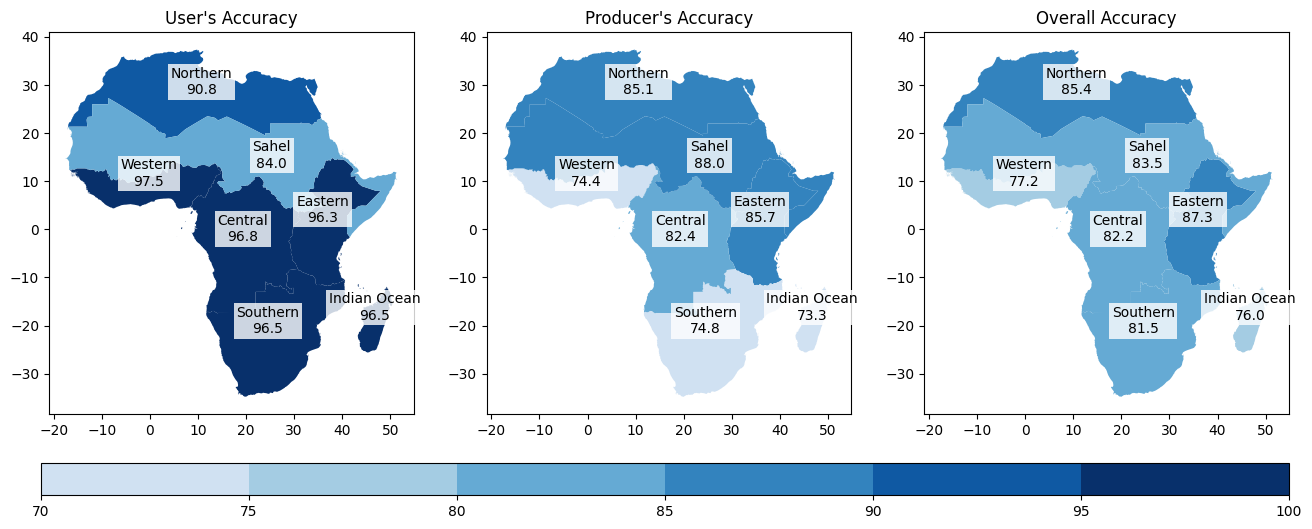

In [12]:
fig, ax = plt.subplots(1,3, figsize=(16,16))
fig.subplots_adjust(bottom=0.2)
# plot colorbar
cax = fig.add_axes([0.12, 0.37, 0.78, 0.02])
#cmap = mpl.cm.Blues

# Get the Blues colormap
blues_cmap = mpl.cm.get_cmap('Blues')
# Define the new colormap range
new_start_color = blues_cmap(0.2)  # Lighter shade of blue
cmap = blues_cmap.from_list('Blues_adjusted', [new_start_color] + list(blues_cmap(np.linspace(0.2, 1, 256))))

bounds = [70, 75, 80, 85, 90, 95, 100]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
# plot colored maps
africa_accuracy.plot('User', ax=ax[0], cmap=cmap, norm=norm)
africa_accuracy.plot('Producer', ax=ax[1], cmap=cmap, norm=norm)
africa_accuracy.plot('Overall', ax=ax[2], cmap=cmap, norm=norm)#, 

# add plot title
ax[0].set_title("User's Accuracy")
ax[1].set_title("Producer's Accuracy")
ax[2].set_title('Overall Accuracy')

# add labels
for idx, row in africa_accuracy.iterrows():
    ax[0].text(row.coords[0], row.coords[1], s=f"{row['COUNTRY'].replace('_', ' ')}\n{row['User']:.1f}", horizontalalignment='center', 
               color='black', fontsize='10', 
               bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
    ax[1].text(row.coords[0], row.coords[1], s=f"{row['COUNTRY'].replace('_', ' ')}\n{row['Producer']:.1f}", horizontalalignment='center', 
               color='black', fontsize='10', 
               bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
    ax[2].text(row.coords[0], row.coords[1], s=f"{row['COUNTRY'].replace('_', ' ')}\n{row['Overall']:.1f}", horizontalalignment='center', 
               color='black', fontsize='10', 
               bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
fig.savefig('Plots/aez_accuracy_map.png', bbox_inches='tight')